In [2]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing

from sklearn.model_selection import train_test_split

#model
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read data

df = pd.read_csv("F:\DataScience Python\Machine Learning\Models\Ensemble Technique\Breast Cancer Prediction\Dataset\cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Explore Data

df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Check for null values

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<AxesSubplot:>

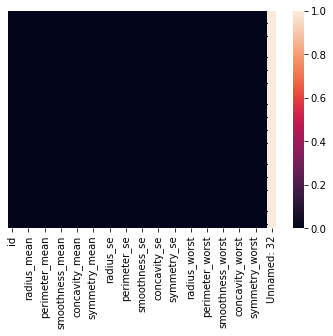

In [7]:
# Visualizing null values

sns.heatmap(df.isna(), yticklabels = False)

In [8]:
# Removing missing values columns

df.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

df.sample()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
137,B,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,...,12.32,22.02,79.93,462.0,0.119,0.1648,0.1399,0.08476,0.2676,0.06765


<AxesSubplot:>

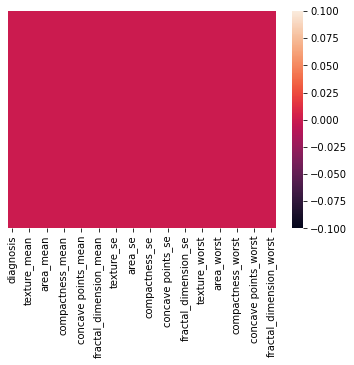

In [9]:
# Visualizing after removing null columns


sns.heatmap(df.isna(), yticklabels = False)

In [10]:
df.drop(["fractal_dimension_mean","texture_se","smoothness_se","fractal_dimension_se",'symmetry_se'],axis=1,inplace=True)

In [11]:
# Categorical Columnns

cat_cols = list(df.select_dtypes(include = 'O'))
cat_cols

['diagnosis']

In [12]:
# Numerical Columnns

num_cols = list(df.select_dtypes(exclude = 'O'))
num_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [13]:
# upsampling

df2 = df[df.diagnosis=='M'].sample(145)
df= pd.concat([df, df2], ignore_index = True)

In [14]:
# Replacing the Target Variable

df.diagnosis.replace(['B', 'M'], [0, 1], inplace = True)

df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
132,1,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,...,19.47,31.68,129.7,1175.0,0.1395,0.3055,0.2992,0.1312,0.3480,0.07619
126,1,13.61,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.03085,0.1761,...,16.89,35.64,113.2,848.7,0.1471,0.2884,0.3796,0.1329,0.3470,0.07900
582,1,19.27,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,...,24.15,30.90,161.4,1813.0,0.1509,0.6590,0.6091,0.1785,0.3672,0.11230
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.74,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400
347,0,14.76,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,...,17.27,17.93,114.2,880.8,0.1220,0.2009,0.2151,0.1251,0.3109,0.08187


In [15]:
# Checking bias in target variable

df.value_counts(df.diagnosis)

diagnosis
1    357
0    357
dtype: int64

In [18]:
# Treating outliers

for i in df.columns:
    if(i=="diagnosis"):
        continue
    else:    
        tenth_percentile = np.percentile(df[i], 10)
        ninetieth_percentile = np.percentile(df[i], 90)
        df[i] = np.where(df[i]>ninetieth_percentile, ninetieth_percentile, df[i])

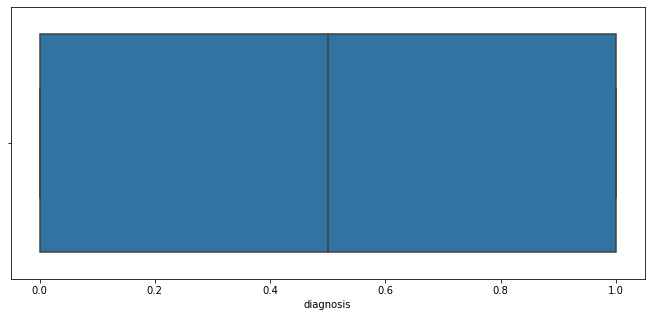

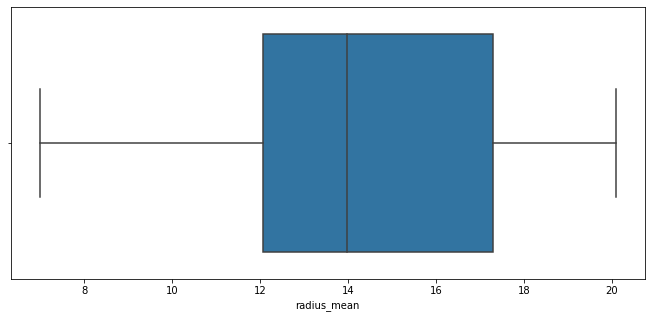

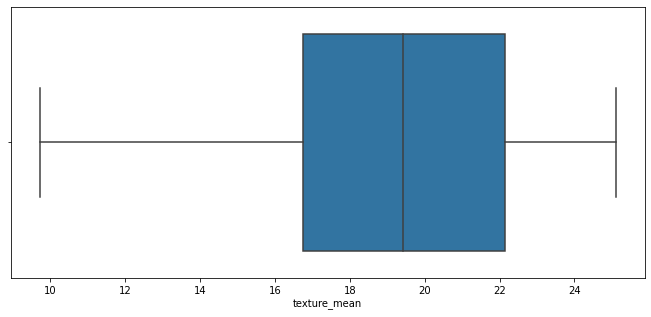

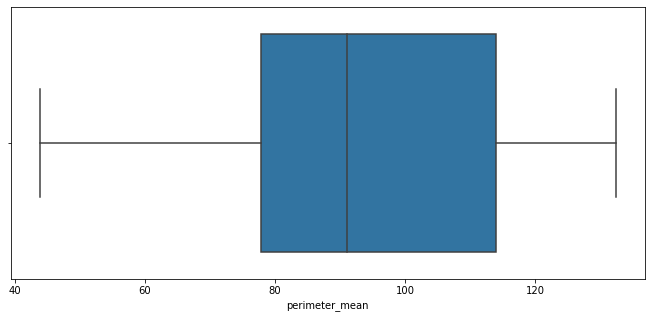

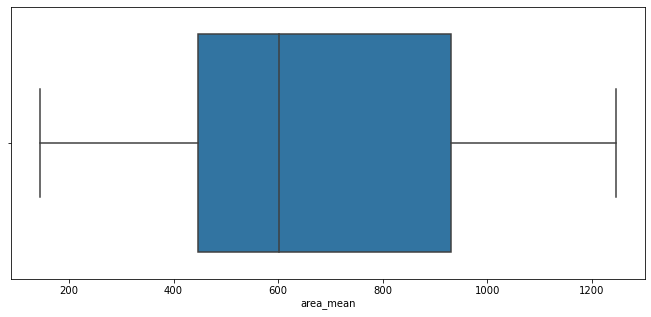

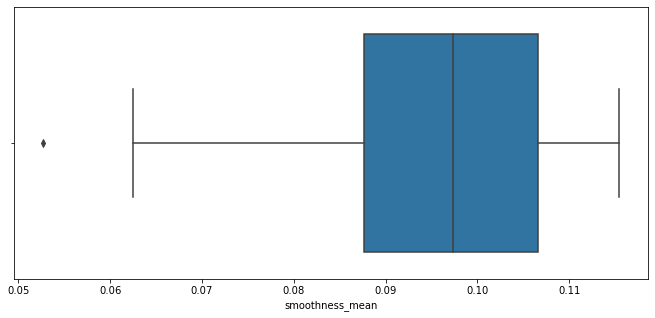

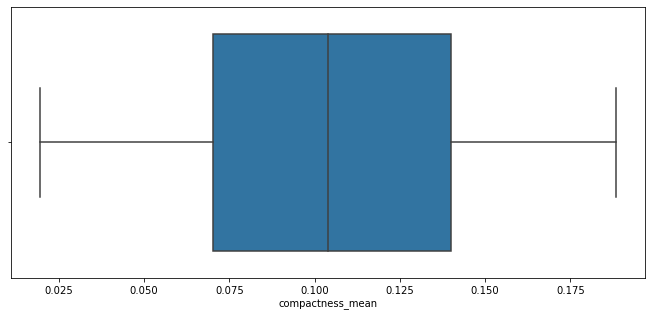

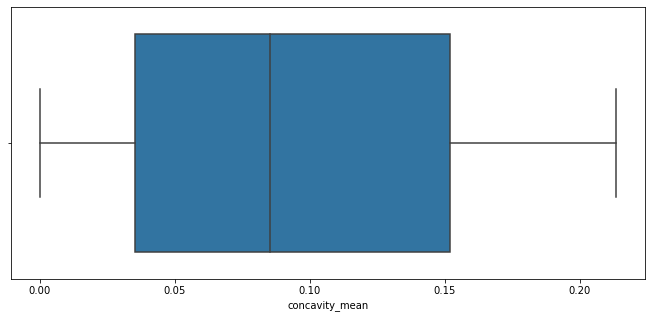

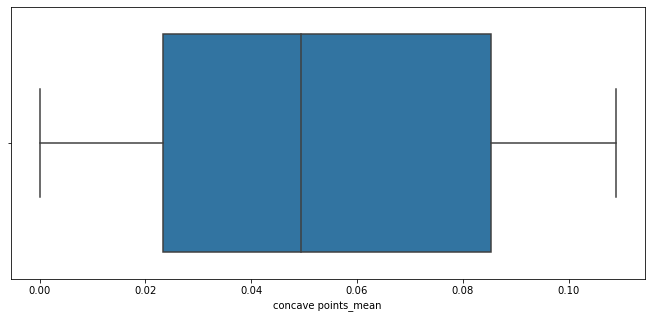

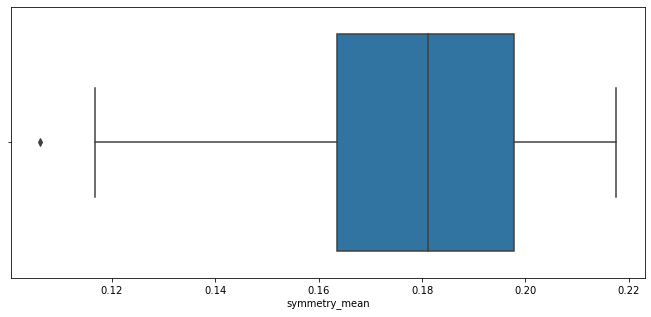

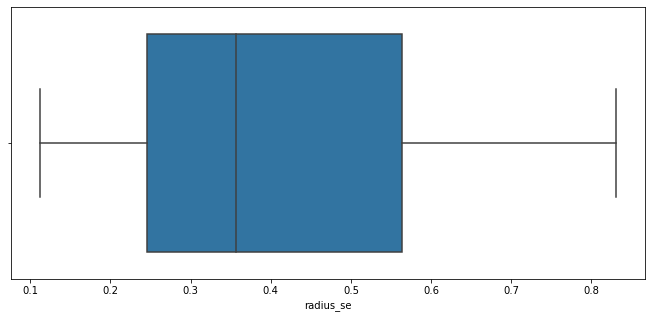

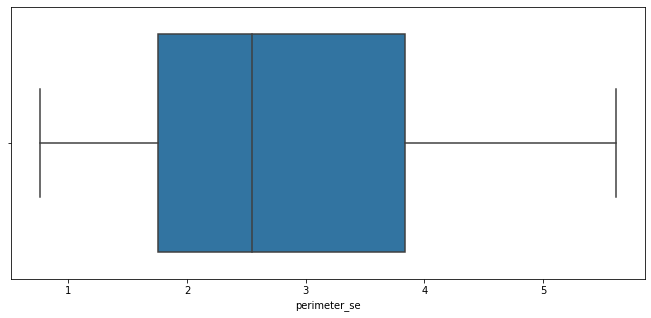

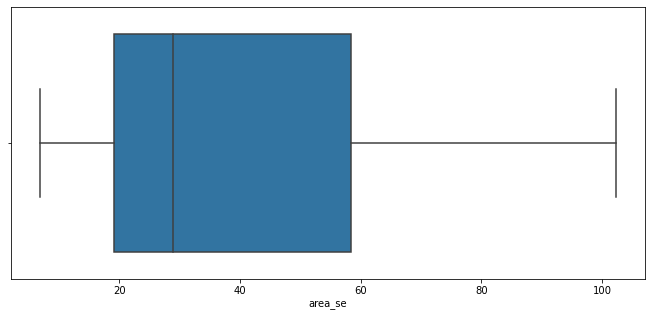

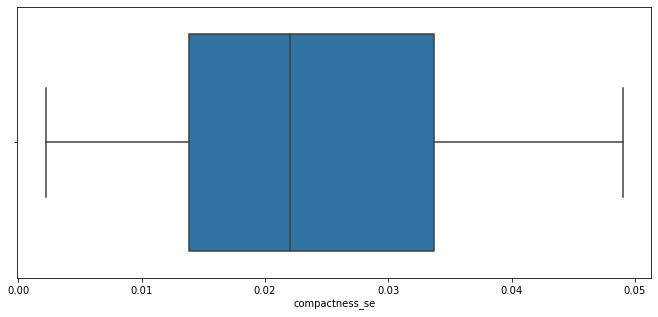

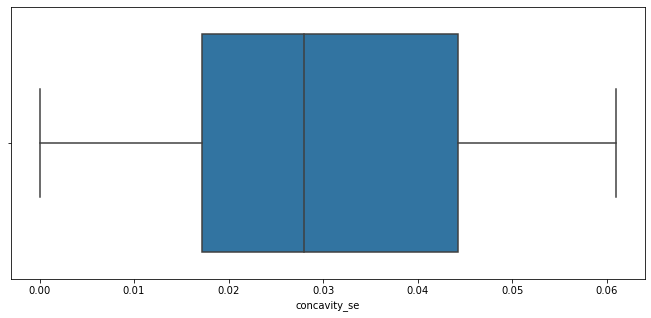

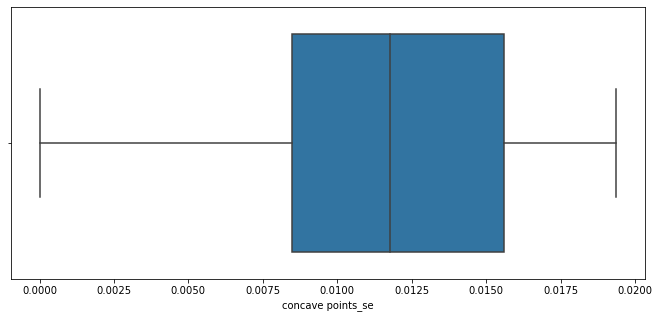

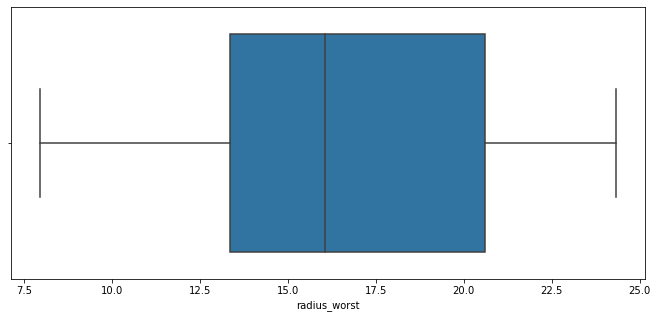

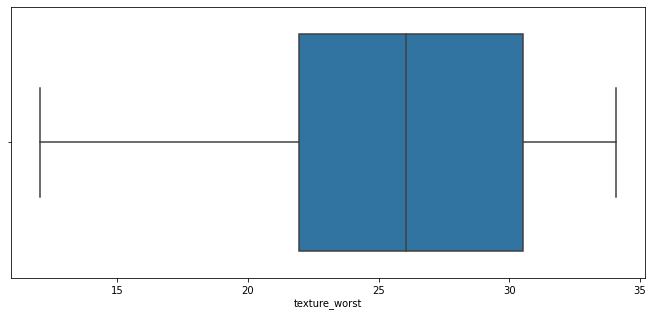

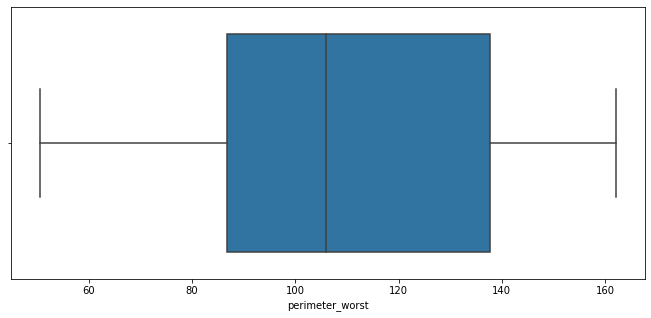

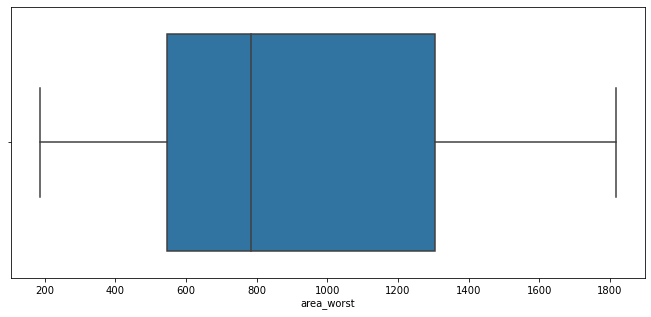

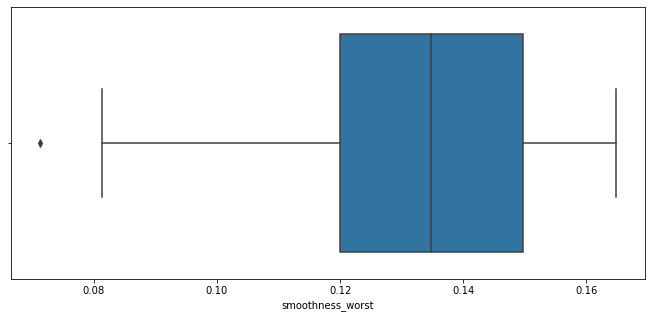

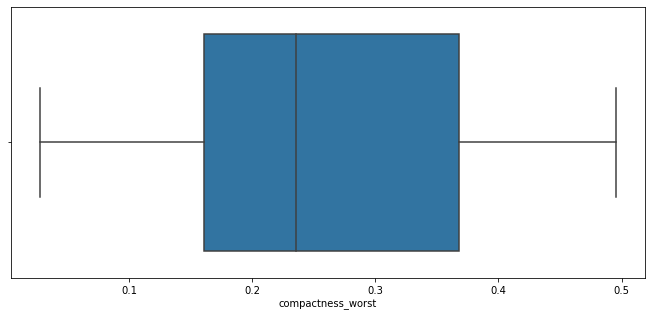

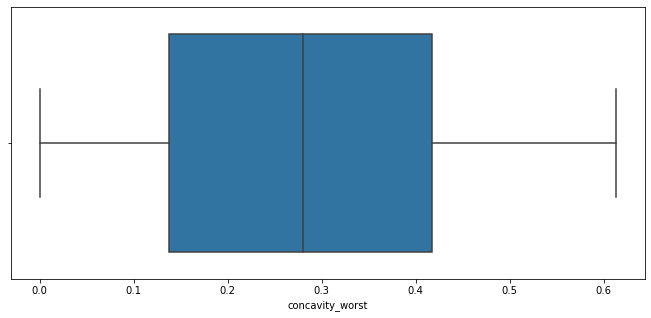

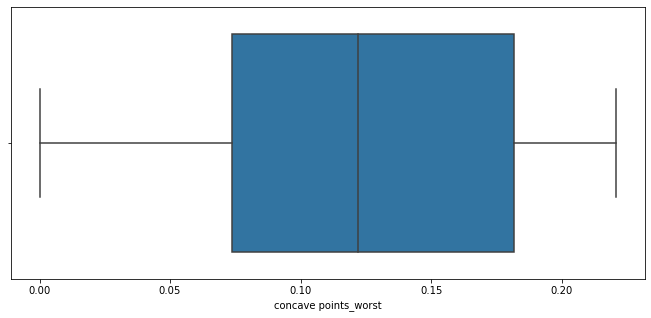

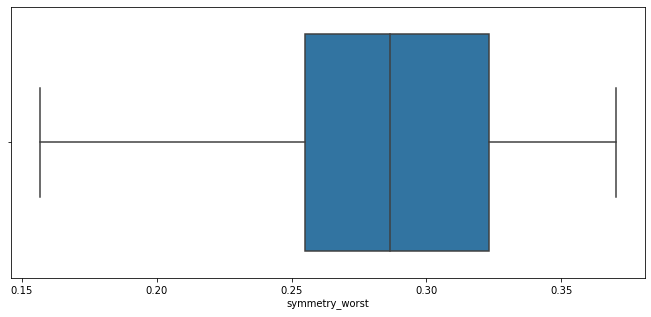

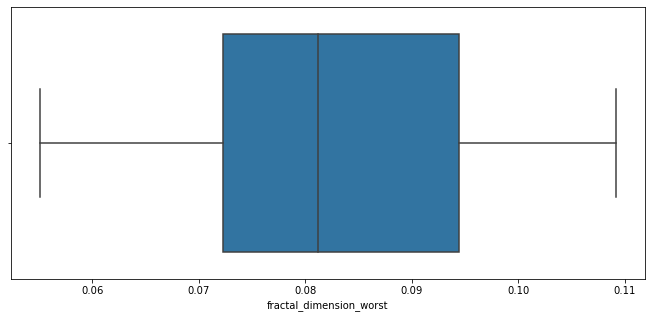

In [19]:
for col in df.columns:
    i = 1
    plt.figure(figsize = (25,5))
    plt.subplot(1,2,i)
    sns.boxplot(df[col])
    i += 1

In [20]:
# Define x and y

X = df.drop('diagnosis', axis = 1)
y = df.diagnosis

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 1)

In [22]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=0)
dTree.fit(X_train, y_train)

print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.9395348837209302


In [23]:
# BaggingClassifier

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier( n_estimators=50,base_estimator=dTree,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_train , y_train))
print(bgcl.score(X_test , y_test))

1.0
0.9674418604651163


In [24]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=100, random_state=1)
abcl = abcl.fit(X_train, y_train)

y_predict = abcl.predict(X_test)

print(abcl.score(X_train , y_train))
print(abcl.score(X_test , y_test))

1.0
0.9674418604651163
